In [1]:
#IMPORT REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import silhouette_score

In [3]:
df=pd.read_csv(r'Downloads/DS1_C9_S6_Practice_Vehicle_Data (1).csv')
df

,Manufacturer,Model,Vehicle_type,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,Passenger,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,02-02-2012,58.280150
1,Acura,TL,Passenger,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,06-03-2011,91.370778
2,Acura,CL,Passenger,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,01-04-2012,NaN
3,Acura,RL,Passenger,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,03-10-2011,91.389779
4,Audi,A4,Passenger,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10-08-2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,Passenger,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,Passenger,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,Passenger,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,Passenger,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [ ]:
#PREPROCESSING THE DATA FOLLOWING
A)MISSING VALUE TREATMENT
B)OUTLIER TREATMENT
C)FEATURE SELECTION BY SELECTING MUTLICOLLINEARITY
D)PERFORM DATA SCALING

In [6]:
df.isnull().sum()

Manufacturer         0
Model                0
Vehicle_type         0
Engine_size          0
Horsepower           0
Wheelbase            0
Width                0
Length               0
Curb_weight          0
Fuel_capacity        0
Fuel_efficiency      0
Latest_Launch        0
Power_perf_factor    0
dtype: int64

In [5]:
#filling missing value with mean
df['Engine_size'] = df['Engine_size'].fillna(df['Engine_size'].mean())
df['Horsepower'] = df['Horsepower'].fillna(df['Horsepower'].mean())
df['Wheelbase'] = df['Wheelbase'].fillna(df['Wheelbase'].mean())
df['Width'] = df['Width'].fillna(df['Width'].mean())
df['Length'] = df['Length'].fillna(df['Length'].mean())
df['Curb_weight'] = df['Curb_weight'].fillna(df['Curb_weight'].mean())
df['Fuel_capacity'] = df['Fuel_capacity'].fillna(df['Fuel_capacity'].mean())
df['Fuel_efficiency'] = df['Fuel_efficiency'].fillna(df['Fuel_efficiency'].mean())
df['Power_perf_factor'] = df['Power_perf_factor'].fillna(df['Power_perf_factor'].mean())


In [7]:
#performing otlier
def outliers(df):
    for col in df.select_dtypes(include=['number']).columns:
        q1=df[col].quantile(0.25)
        q3=df[col].quantile(0.75)
        IQR=q3-q1
        LF=q1-1.5*IQR
        UF=q3+1.5*IQR
        outlier=df[(df[col]<LF) | (df[col]>UF)]
    return outlier

# call
alloutlier=outliers(df)
alloutlier

,Manufacturer,Model,Vehicle_type,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
6,Audi,A8,Passenger,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858
24,Chevrolet,Corvette,Passenger,5.7,345.0,104.5,73.6,179.7,3.210,19.1,22.0,05-12-2012,141.141150
39,Dodge,Viper,Passenger,8.0,450.0,96.2,75.7,176.7,3.375,19.0,16.0,08-07-2011,188.144323
95,Mercedes-B,SL-Class,Passenger,5.0,302.0,99.0,71.3,177.1,4.125,21.1,20.0,3/17/2011,139.982294
99,Mercedes-B,CL500,Passenger,5.0,302.0,113.6,73.1,196.6,4.115,23.2,20.0,04-11-2011,141.100985
125,Porsche,Carrera Coupe,Passenger,3.4,300.0,92.6,69.5,174.5,3.032,17.0,21.0,12/21/2012,134.390975
126,Porsche,Carrera Cabrio,Passenger,3.4,300.0,92.6,69.5,174.5,3.075,17.0,23.0,07-11-2011,135.914710


In [9]:
# Removed outliers for all the columns:
def remove_outliers(df):
    for col in df.select_dtypes(include=['number']).columns:
        q1=df[col].quantile(0.25)
        q3=df[col].quantile(0.75)
        IQR=q3-q1
        LF=q1-1.5*IQR
        UF=q3+1.5*IQR
        outlier_removal=df[(df[col]<=LF) & (df[col]>=UF)]
    return outlier_removal
alloutlier=remove_outliers(df)
df

,Manufacturer,Model,Vehicle_type,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,Passenger,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,02-02-2012,58.280150
1,Acura,TL,Passenger,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,06-03-2011,91.370778
2,Acura,CL,Passenger,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,01-04-2012,77.043591
3,Acura,RL,Passenger,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,03-10-2011,91.389779
4,Audi,A4,Passenger,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10-08-2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,Passenger,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,Passenger,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,Passenger,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,Passenger,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


<Axes: >

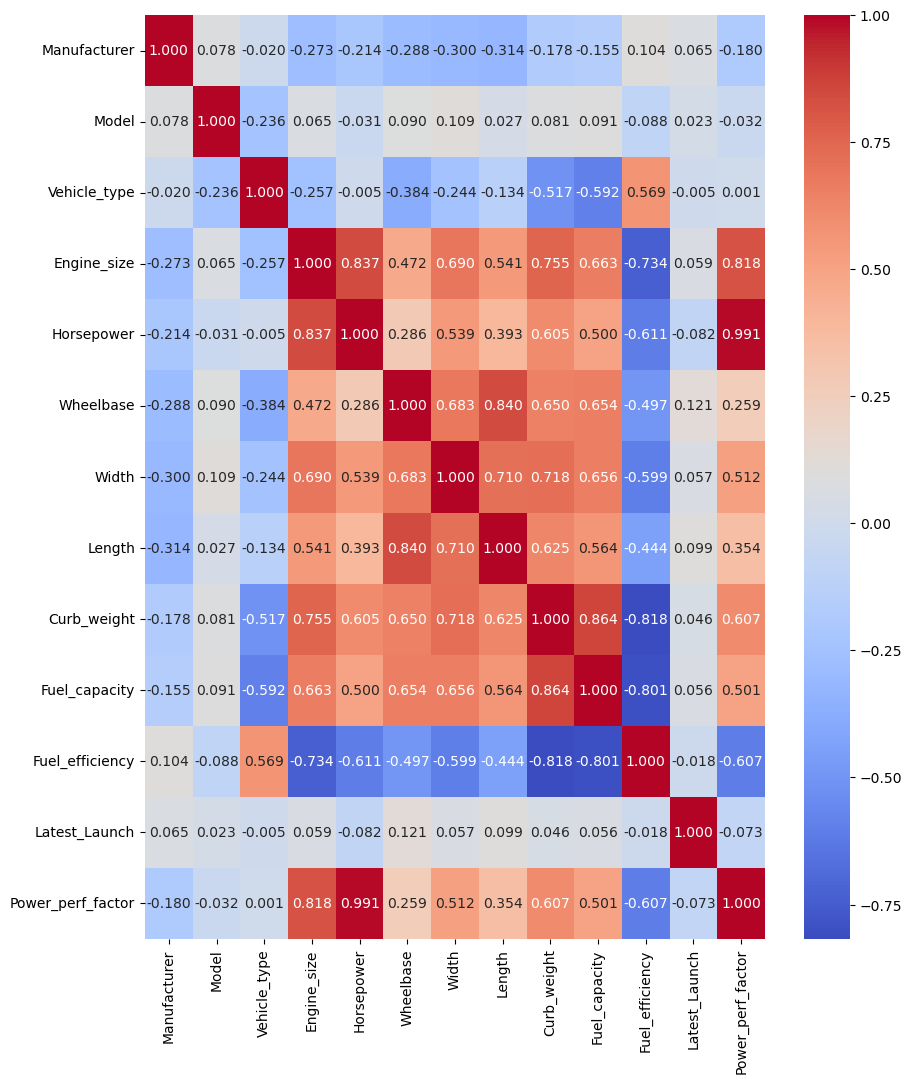

In [16]:
#MULTICOLLINEARITY
df1=df.corr()
plt.figure(figsize=(10,12))
sb.heatmap(df1, annot=True, fmt=".3f", cmap="coolwarm", cbar=True)

In [24]:
#DATA SCALING
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Categorical Columns: {list(categorical_cols)}")
for col in categorical_cols:
    print(df[col])

Categorical Columns: ['cluster']
0      KMeans(n_clusters=2, random_state=42)
1      KMeans(n_clusters=2, random_state=42)
2      KMeans(n_clusters=2, random_state=42)
3      KMeans(n_clusters=2, random_state=42)
4      KMeans(n_clusters=2, random_state=42)
                       ...                  
152    KMeans(n_clusters=2, random_state=42)
153    KMeans(n_clusters=2, random_state=42)
154    KMeans(n_clusters=2, random_state=42)
155    KMeans(n_clusters=2, random_state=42)
156    KMeans(n_clusters=2, random_state=42)
Name: cluster, Length: 157, dtype: object


In [25]:
df[col] = df[col].astype('category')
print(df.dtypes)

Manufacturer            int32
Model                   int32
Vehicle_type            int32
Engine_size           float64
Horsepower            float64
Wheelbase             float64
Width                 float64
Length                float64
Curb_weight           float64
Fuel_capacity         float64
Fuel_efficiency       float64
Latest_Launch           int32
Power_perf_factor     float64
cluster              category
dtype: object


In [26]:
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder directly

label_encoder = LabelEncoder()
for col in categorical_cols:  # Use categorical_cols directly as it's a list of column names
    df[col] = label_encoder.fit_transform(df[col])

In [28]:
# D) Perform data scaling
from sklearn.preprocessing import StandardScaler  # Import StandardScaler
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
print("Data Scaling Completed.")
data_scaled

Data Scaling Completed.


,Manufacturer,Model,Vehicle_type,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,cluster
0,-1.694221,0.029623,0.594515,-1.214763,-0.81559,-0.828080,-1.122510,-1.119712,-1.183485,-1.230087,0.982981,-1.646086,-0.753513,0.0
1,-1.694221,1.453800,0.594515,0.134013,0.69316,0.080714,-0.247827,0.416338,0.222555,-0.194644,0.273392,-1.229967,0.575359,0.0
2,-1.694221,-1.172026,0.594515,0.134013,0.69316,-0.077337,-0.160359,0.348901,0.147289,-0.194644,0.509921,-1.698100,0.000000,0.0
3,-1.694221,0.830723,0.594515,0.423037,0.42691,0.936825,0.072890,0.693576,0.755825,0.012445,-0.436198,-1.464034,0.576122,0.0
4,-1.577506,-1.550323,0.594515,-1.214763,-0.63809,-0.643687,-0.860105,-0.700108,-0.608578,-0.401732,0.746451,-0.397731,-0.572900,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,1.690504,1.565064,0.594515,-1.118422,-0.46059,-0.920277,-1.035041,-0.805009,-0.538116,-0.557049,0.273392,1.552824,-0.423463,0.0
153,1.690504,1.053250,0.594515,-0.636716,-0.31859,-0.340756,-0.539388,-0.108167,-0.272281,-0.013441,0.273392,-0.007620,-0.256577,0.0
154,1.690504,1.587317,0.594515,-0.636716,-0.31859,-0.340756,-0.539388,-0.085688,-0.190609,-0.013441,0.273392,1.136705,-0.236438,0.0
155,1.690504,-1.194279,0.594515,-0.733058,0.88841,-0.340756,0.102046,-0.123153,0.357074,0.141876,-0.199668,0.850624,0.987088,0.0


In [ ]:
#TASK2 
COMPLETE ELBOW AND SILHOUETTE VALUES TO FIND THE BEST NUMBER OF CLUSTER K VALUE FOR THE K MEANS ALGORITHM


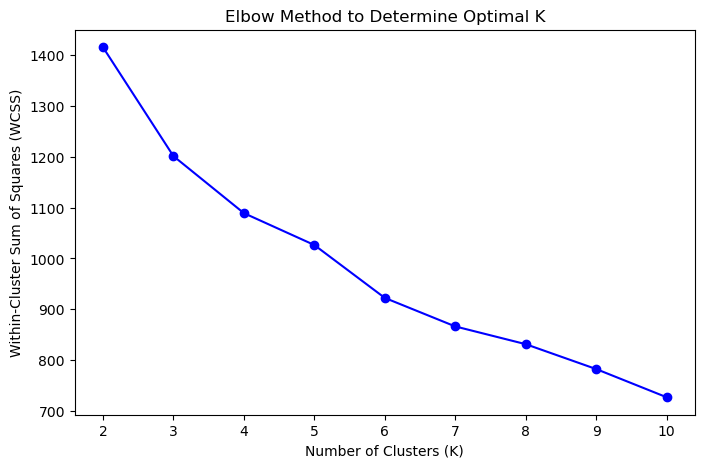

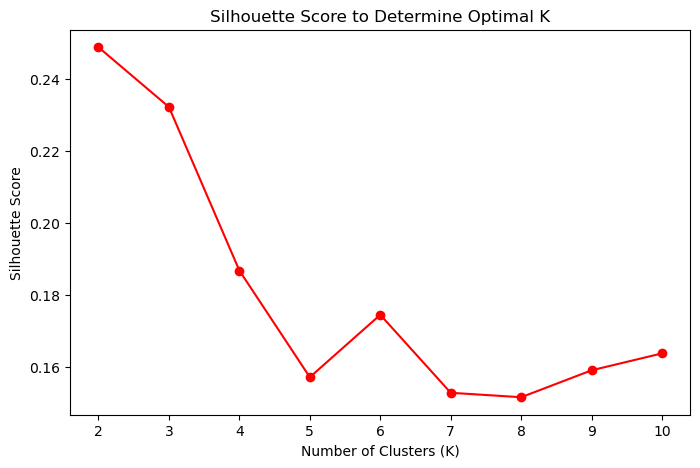

Elbow WCSS values for each K: [1415.2660658075783, 1201.1868251888068, 1089.0634147783426, 1026.3572316063987, 922.3758290716977, 866.2842566065533, 831.3721650647155, 782.4675494123753, 727.0576201715774]
Silhouette Scores for each K: [0.2487954887446026, 0.2321747671501545, 0.18671578715075968, 0.15706168813111782, 0.17441168994665956, 0.15272654007080225, 0.15149603181983037, 0.1589864239626577, 0.16368205965861726]


In [30]:
wcss = []
k_values = range(2, 11)  

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)  

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method to Determine Optimal K')
plt.show()

# Silhouette Scores
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    df['cluster'] = kmeans.fit_predict(data_scaled)  # Fixed to use data_scaled
    silhouette = silhouette_score(data_scaled, df['cluster'])
    silhouette_scores.append(silhouette)

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score to Determine Optimal K')
plt.show()

# Print Results
print("Elbow WCSS values for each K:", wcss)
print("Silhouette Scores for each K:", silhouette_scores)


In [ ]:
#TASK3
APPLY K MEANS ALGORITHM TO BUILD THE MODEL USING THE BEST VALUE OF K AND FIT YOUR DATASET TO TRAIN THE MODEL

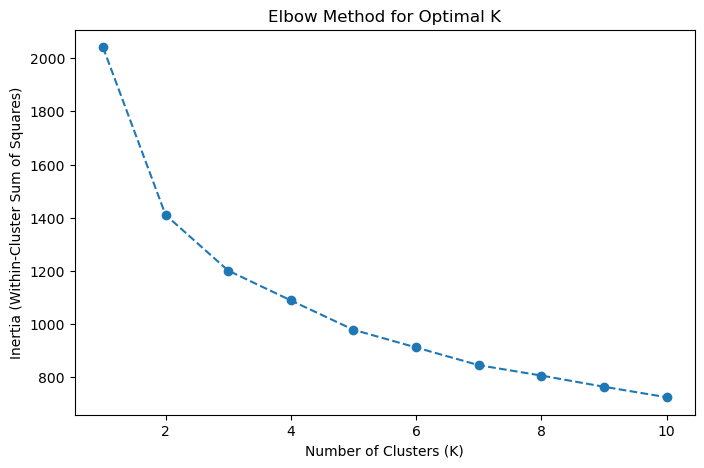

10


In [31]:
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster=kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()
print(k)

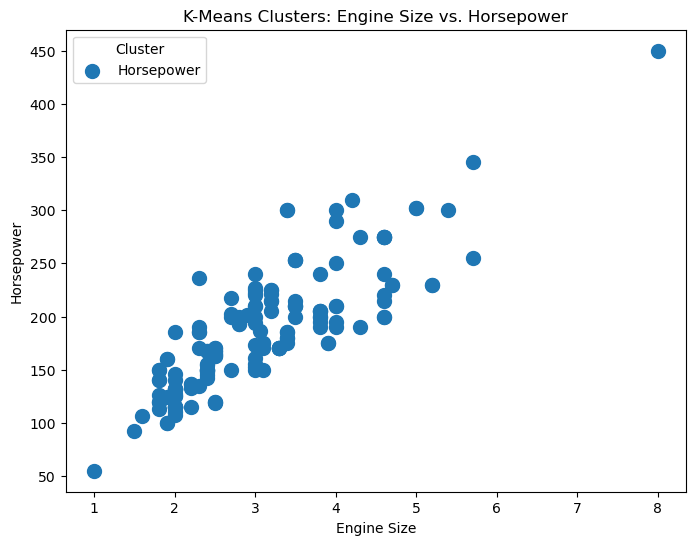

In [32]:
#Visualize Clusters for Engine Size vs. Horsepower
# Scatter plot for Engine Size vs Horsepower with clusters
plt.figure(figsize=(8, 6))
plt.scatter(data=df, x='Engine_size', y='Horsepower', s=100)
plt.title('K-Means Clusters: Engine Size vs. Horsepower')
plt.xlabel('Engine Size')
plt.ylabel('Horsepower')
plt.legend(title='Cluster')
plt.show()

In [37]:
#task4
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(data_scaled,df['cluster'])
print(f"Silhouette Score: {silhouette_avg:.3f}")


Silhouette Score: 0.164


In [ ]:
#interpretation: The silhoutee score is 0.164
and also the value of k is 10 it means 10 is the best value for the data.